In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split

In [4]:
games = pd.read_csv("data/csv/game.csv")

In [5]:
games.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [75]:
plays = pd.read_csv("data/game_plays.csv")

In [76]:
plays.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right
4,2011030221_5,2011030221,5,4.0,1.0,Giveaway,NaN,28.0,24.0,1,REGULAR,21,1179,2012-04-29 19:21:02,0,0,Giveaway by Kimmo Timonen,-28.0,-24.0,right


In [4]:
# plays[((plays['event'] == 'Goal') & (plays['st_x'] == 55))].head()

In [5]:
# plays.groupby(['game_id']).size().describe()

In [77]:
print(plays['event'].unique())
print(len(plays['event'].unique()))

['Game Scheduled' 'Period Ready' 'Period Start' 'Faceoff' 'Giveaway'
 'Blocked Shot' 'Shot' 'Hit' 'Stoppage' 'Goal' 'Penalty' 'Takeaway'
 'Missed Shot' 'Period End' 'Period Official' 'Game End' 'Game Official'
 'Official Challenge' 'Shootout Complete' 'Early Intermission Start'
 'Early Intermission End' 'Emergency Goaltender']
22


In [78]:
relevant_events = ['Goal']
plays = plays.loc[plays['event'].isin(relevant_events),:]

In [79]:
plays['game_time'] = (plays['period']-1)*1200+plays['periodTime']
# plays = plays.loc[plays['game_time'] <= 3000, :]

In [80]:
plays = plays.loc[~((plays['x']==0) & (plays['y']==0) & (plays['event']=='Faceoff'))]

In [149]:
# plays = plays.dropna()

In [79]:
# plays.groupby(['game_id']).size()

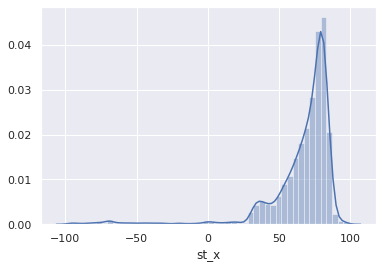

In [9]:
sns.set()

sns.distplot(plays.loc[plays['event']=='Goal','st_x'].dropna())
plt.show()

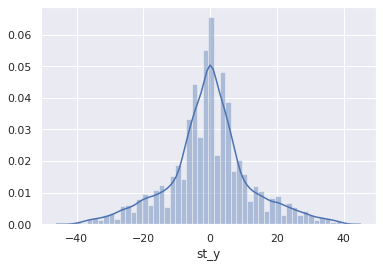

In [10]:
sns.distplot(plays.loc[plays['event']=='Goal','st_y'].dropna())
plt.show()

In [11]:
def distance(x):
    return np.sqrt((x[0]-90.0)**2+x[1]**2)

def angle(x):
    if 90.0-x[0] == x[1]:
        return 0
    else:
        return np.degrees(np.arccos((90.0-x[0])/x[1]))
    
def danger(distance):
    if distance <= 15:
        return 'a_high'
    elif distance <= 30:
        return 'b_med'
    else:
        return 'c_low'

In [51]:
plays['distance'] = plays.loc[:,['st_x', 'st_y']].apply(distance, axis=1)

In [10]:
plays['angle'] = plays.loc[:,['st_x', 'distance']].apply(angle, axis=1)

In [52]:
plays['danger'] = 'd_not_a_shot'
shots = ['Shot', 'Missed Shot', 'Goal']
plays.loc[plays['event'].isin(shots), 'danger'] = plays.loc[plays['event'].isin(shots), 'distance'].apply(danger)

In [10]:
plays.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,game_time
15,2011030221_16,2011030221,16,1.0,4.0,Goal,Wrist Shot,73.0,11.0,1,...,196,1004,2012-04-29 19:24:26,1,0,"Zach Parise (3) Wrist Shot, assists: Patrik El...",73.0,11.0,left,196
133,2011030221_134,2011030221,134,4.0,1.0,Goal,Wrist Shot,79.0,-1.0,2,...,487,713,2012-04-29 20:24:10,1,1,"Daniel Briere (6) Wrist Shot, assists: Jakub V...",79.0,-1.0,left,1687
141,2011030221_142,2011030221,142,4.0,1.0,Goal,Snap Shot,67.0,10.0,2,...,524,676,2012-04-29 20:28:48,1,2,"James van Riemsdyk (1) Snap Shot, assists: Eri...",67.0,10.0,left,1724
161,2011030221_162,2011030221,162,1.0,4.0,Goal,Tip-In,-80.0,1.0,2,...,833,367,2012-04-29 20:38:47,2,2,"Travis Zajac (4) Tip-In, assists: Zach Parise ...",80.0,-1.0,right,2033
235,2011030221_236,2011030221,236,4.0,1.0,Goal,Slap Shot,-69.0,-28.0,3,...,259,941,2012-04-29 21:19:57,2,3,"Claude Giroux (7) Slap Shot, assists: Kimmo Ti...",69.0,28.0,right,2659


In [ ]:
# plays.to_csv("data/plays_improved.csv")

In [ ]:
# goals = plays[plays['event']=='Goal']

In [ ]:
plays[((plays['event']=='Goal') & (plays['distance'] > 30))].shape[0]

In [26]:
n_goals_high = plays[((plays['event']=='Goal') & (plays['distance'] <= 15))].shape[0]
n_shots_high = n_goals_high + plays[(((plays['event']=='Shot') | (plays['event']==' Missed Shot')) & (plays['distance'] <= 15))].shape[0]

print(n_goals_high / n_shots_high)

0.17609798430748033


In [28]:
n_goals_low = plays[((plays['event']=='Goal') & (plays['distance'] > 30))].shape[0]
n_shots_low = n_goals_low + plays[(((plays['event']=='Shot') | (plays['event']==' Missed Shot')) & (plays['distance'] > 30))].shape[0]

print(n_goals_low / n_shots_low)

0.040507909030469524


In [29]:
n_goals_med = plays[((plays['event']=='Goal') & (plays['distance'] <= 30) & (plays['distance'] > 15))].shape[0]
n_shots_med = n_goals_med + plays[(((plays['event']=='Shot') | (plays['event']==' Missed Shot')) & (plays['distance'] <= 30) & 
                                   (plays['distance'] > 15))].shape[0]

print(n_goals_med / n_shots_med)

0.11988529750015132


In [17]:
plays[((plays['event']=='Goal') & ((plays['distance'] > 45) | (plays['angle'] > 40)))].shape[0]

(14732, 23)

In [13]:
plays[plays['event']=='Goal'].shape

(48454, 23)

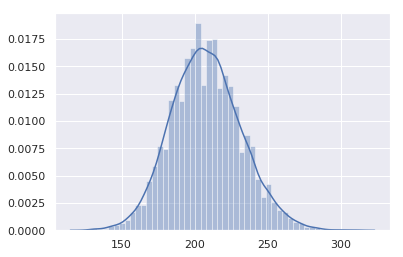

In [19]:
sns.set()

sns.distplot(plays.groupby(['game_id']).size())
plt.show()

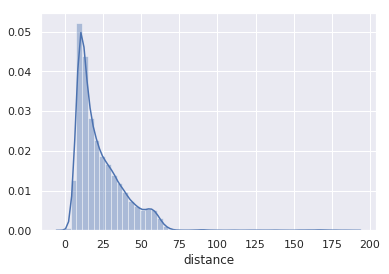

In [20]:
sns.distplot(plays.loc[plays['event']=='Goal', 'distance'].dropna())

plt.show()

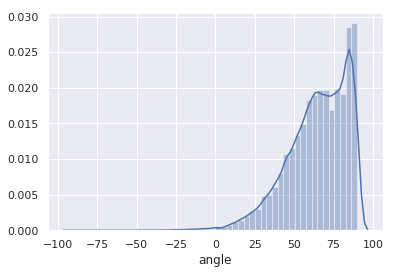

In [20]:
sns.distplot(plays.loc[plays['event']=='Goal', 'angle'].dropna())

plt.show()

In [11]:
plays.groupby(['game_id']).size().describe()

count    11244.000000
mean         5.710601
std          2.314895
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         17.000000
dtype: float64

In [12]:
plays.groupby(['game_id']).size().min()

1

In [13]:
index_min = plays.groupby(['game_id']).size().idxmin()

In [14]:
plays.loc[plays['game_id']==index_min].tail()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,...,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side,game_time
3387883,2010020036_273,2010020036,273,1.0,7.0,Goal,Slap Shot,-63.0,11.0,4,...,53,247,2010-10-14 01:23:23,1,0,"Ilya Kovalchuk (1) Slap Shot, assists: Matt Ta...",63.0,-11.0,left,3653


In [16]:
# plays.loc[plays['game_id']==index_min]['game_time'].values[118]

In [81]:
lower = plays.groupby(['game_id']).size().describe()['25%'].astype(np.int64)
upper = plays.groupby(['game_id']).size().describe()['75%'].astype(np.int64)

print(lower, upper)

4 7


In [13]:
# min_events = int(plays.groupby(['game_id']).size().min())

times = []

for game_id in plays['game_id'].unique():
    n_events = len(plays.loc[plays['game_id']==game_id])
    if n_events >= lower and n_events <= upper:
        times.append(plays.loc[plays['game_id']==game_id]['game_time'].values[-1])

In [14]:
print(np.amin(times))

3467


In [82]:
ids = []

for game_id in plays['game_id'].unique():
    n_events = len(plays.loc[plays['game_id']==game_id])
    if n_events >= lower and n_events <= upper:
        ids.append(game_id)

In [83]:
plays = plays.loc[plays['game_id'].isin(ids)]

In [84]:
relevant_columns = ['game_id', 'team_id_for', 'team_id_against', 'event',
                   'st_x', 'st_y', 'game_time', 'danger']
plays = plays.loc[:, plays.columns.isin(relevant_columns)]

In [85]:
plays.head()

,game_id,team_id_for,team_id_against,event,st_x,st_y,game_time
15,2011030221,1.0,4.0,Goal,73.0,11.0,196
133,2011030221,4.0,1.0,Goal,79.0,-1.0,1687
141,2011030221,4.0,1.0,Goal,67.0,10.0,1724
161,2011030221,1.0,4.0,Goal,80.0,-1.0,2033
235,2011030221,4.0,1.0,Goal,69.0,28.0,2659


In [27]:
# plays = plays.set_index('game_id')

In [86]:
plays = pd.get_dummies(plays, columns=['event'])

In [87]:
plays.head()

,game_id,team_id_for,team_id_against,st_x,st_y,game_time,event_Goal
15,2011030221,1.0,4.0,73.0,11.0,196,1
133,2011030221,4.0,1.0,79.0,-1.0,1687,1
141,2011030221,4.0,1.0,67.0,10.0,1724,1
161,2011030221,1.0,4.0,80.0,-1.0,2033,1
235,2011030221,4.0,1.0,69.0,28.0,2659,1


In [30]:
# teams = pd.read_csv('data/team_info.csv')

In [31]:
# teams.head()

In [88]:
plays.rename(columns=lambda x: x.replace(' ', '_').lower(), inplace=True)

In [89]:
plays.head()

,game_id,team_id_for,team_id_against,st_x,st_y,game_time,event_goal
15,2011030221,1.0,4.0,73.0,11.0,196,1
133,2011030221,4.0,1.0,79.0,-1.0,1687,1
141,2011030221,4.0,1.0,67.0,10.0,1724,1
161,2011030221,1.0,4.0,80.0,-1.0,2033,1
235,2011030221,4.0,1.0,69.0,28.0,2659,1


In [24]:
plays.columns

Index(['game_id', 'team_id_for', 'team_id_against', 'st_x', 'st_y',
       'game_time', 'event_goal'],
      dtype='object')

In [25]:
plays.groupby(['game_id']).size().describe()

count    6959.000000
mean        5.607271
std         1.069292
min         4.000000
25%         5.000000
50%         5.000000
75%         7.000000
max         7.000000
dtype: float64

In [21]:
# plays = pd.get_dummies(plays, columns=['abbreviation_for', 'abbreviation_against'])

In [90]:
games = pd.read_csv('data/game.csv')
games.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [91]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39021 entries, 15 to 3631985
Data columns (total 7 columns):
game_id            39021 non-null int64
team_id_for        39021 non-null float64
team_id_against    39021 non-null float64
st_x               39009 non-null float64
st_y               39011 non-null float64
game_time          39021 non-null int64
event_goal         39021 non-null uint8
dtypes: float64(4), int64(2), uint8(1)
memory usage: 2.1 MB


In [92]:
games = games.loc[games['game_id'].isin(plays['game_id'].unique()), :]

In [93]:
games = games.sort_values(by='game_id')

In [94]:
games['outcome'].unique()

array(['home win REG', 'away win REG', 'home win OT', 'away win OT',
       'away win SO', 'home win SO'], dtype=object)

In [95]:
plays = plays.merge(games, on='game_id')
plays.head()

,game_id,team_id_for,team_id_against,st_x,st_y,game_time,event_goal,season,type,date_time,...,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,1.0,4.0,73.0,11.0,196,1,20112012,P,2012-04-29,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030221,4.0,1.0,79.0,-1.0,1687,1,20112012,P,2012-04-29,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030221,4.0,1.0,67.0,10.0,1724,1,20112012,P,2012-04-29,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030221,1.0,4.0,80.0,-1.0,2033,1,20112012,P,2012-04-29,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030221,4.0,1.0,69.0,28.0,2659,1,20112012,P,2012-04-29,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [96]:
plays.columns

Index(['game_id', 'team_id_for', 'team_id_against', 'st_x', 'st_y',
       'game_time', 'event_goal', 'season', 'type', 'date_time',
       'date_time_GMT', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')

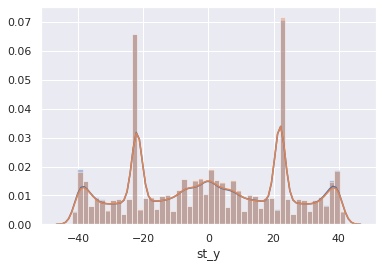

In [33]:
sns.distplot(plays.loc[plays['team_id_for']==plays['home_team_id']]['st_y'].dropna())
sns.distplot(plays.loc[plays['team_id_for']==plays['away_team_id']]['st_y'].dropna())

plt.show()

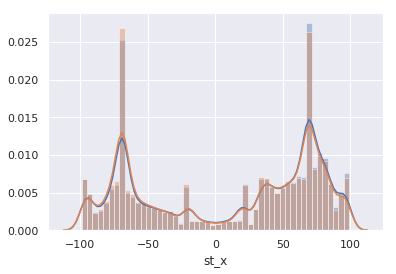

In [42]:
sns.distplot(plays.loc[plays['team_id_for']==plays['home_team_id']]['st_x'].dropna())
sns.distplot(plays.loc[plays['team_id_for']==plays['away_team_id']]['st_x'].dropna())

plt.show()

In [97]:
def home_team_for(ids):
    if ids[0] == ids[1]:
        return 'for'
    else:
        return 'against'
    
def result(result):
    if ('OT' or 'SO') in result:
        return 'b_tie'
    elif 'home' in result:
        return 'a_home_win'
    else:
        return 'c_away_win'
    
def offensive_zone_home(x):
    if x[0] >= 25 and x[1] == 1:
        return 1
    elif x[0] <= -25 and x[1] == 0:
        return 1
    else:
        return 0

def offensive_zone_away(x):
    if x[0] >= 25 and x[1] == 0:
        return 1
    if x[0] <= -25 and x[1] == 1:
        return 1
    else:
        return 0

In [98]:
plays['home_team_for'] = plays[['team_id_for', 'home_team_id']].apply(home_team_for, axis=1)

In [99]:
games['result'] = games['outcome'].apply(result)

In [100]:
print(plays['home_team_for'].value_counts())
print(games['result'].value_counts())

for        20500
against    18521
Name: home_team_for, dtype: int64
a_home_win    3324
c_away_win    2710
b_tie          925
Name: result, dtype: int64


In [101]:
plays.head()

,game_id,team_id_for,team_id_against,st_x,st_y,game_time,event_goal,season,type,date_time,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,home_team_for
0,2011030221,1.0,4.0,73.0,11.0,196,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,against
1,2011030221,4.0,1.0,79.0,-1.0,1687,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,for
2,2011030221,4.0,1.0,67.0,10.0,1724,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,for
3,2011030221,1.0,4.0,80.0,-1.0,2033,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,against
4,2011030221,4.0,1.0,69.0,28.0,2659,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,for


In [37]:
plays.columns

Index(['game_id', 'team_id_for', 'team_id_against', 'st_x', 'st_y',
       'game_time', 'event_goal', 'season', 'type', 'date_time',
       'date_time_GMT', 'away_team_id', 'home_team_id', 'away_goals',
       'home_goals', 'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset', 'venue_time_zone_tz',
       'home_team_for'],
      dtype='object')

In [102]:
pd.get_dummies(games['result'])

,a_home_win,b_tie,c_away_win
11078,1,0,0
10725,0,0,1
9625,0,0,1
10256,0,1,0
10673,1,0,0
...,...,...,...
11427,1,0,0
11428,0,1,0
11430,1,0,0
11432,0,0,1


In [39]:
pd.get_dummies(games['result']).to_numpy(dtype=np.int8)

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=int8)

In [103]:
y = pd.get_dummies(games['result']).to_numpy(dtype=np.int8)

In [104]:
plays['home_team_for'] = plays['home_team_for'].astype('category').cat.codes

In [105]:
plays.head()

,game_id,team_id_for,team_id_against,st_x,st_y,game_time,event_goal,season,type,date_time,...,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz,home_team_for
0,2011030221,1.0,4.0,73.0,11.0,196,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,0
1,2011030221,4.0,1.0,79.0,-1.0,1687,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1
2,2011030221,4.0,1.0,67.0,10.0,1724,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1
3,2011030221,1.0,4.0,80.0,-1.0,2033,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,0
4,2011030221,4.0,1.0,69.0,28.0,2659,1,20112012,P,2012-04-29,...,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT,1


In [106]:
plays['home_team_for'][:5]

0    0
1    1
2    1
3    0
4    1
Name: home_team_for, dtype: int8

In [107]:
relevant_columns = ['game_id', 'st_x', 'st_y', 'game_time', 'distance', 'angle', 'home_team_for']

In [108]:
plays = plays.loc[:, (plays.columns.isin(relevant_columns) | plays.columns.str.contains('event') | plays.columns.str.contains('danger'))]

In [109]:
plays.head()

,game_id,st_x,st_y,game_time,event_goal,home_team_for
0,2011030221,73.0,11.0,196,1,0
1,2011030221,79.0,-1.0,1687,1,1
2,2011030221,67.0,10.0,1724,1,1
3,2011030221,80.0,-1.0,2033,1,0
4,2011030221,69.0,28.0,2659,1,1


In [49]:
plays['offensive_zone_home'] = plays[['st_x', 'home_team']].apply(offensive_zone_home, axis=1)
plays['offensive_zone_away'] = plays[['st_x', 'home_team']].apply(offensive_zone_away, axis=1)

In [110]:
n_games = len(plays.game_id.unique())
n_events = plays.groupby(['game_id']).size().describe()['min'].astype(np.int64)
n_columns = len(plays.columns)-1

In [111]:
n_columns = 2

X = np.zeros((n_games, n_events, n_columns), dtype=np.int32)

print(n_games, n_events, n_columns)
print(X.shape)

6959 4 2
(6959, 4, 2)


In [112]:
for i, game_id in enumerate(sorted(plays.game_id.unique())):
    game_events = plays[plays['game_id'] == game_id].iloc[:n_events,4:].to_numpy(dtype=np.int32)
    # fill = np.full((n_events-game_events.shape[0], n_columns), np.nan)
    # full_events = np.vstack((game_events, fill))
    X[i] = game_events    

In [113]:
for i, game_id in enumerate(sorted(plays.game_id.unique())):
    print(game_id)
    if i == 10:
        break

2010020001
2010020002
2010020003
2010020004
2010020005
2010020006
2010020007
2010020009
2010020011
2010020012
2010020014


In [115]:
print(np.array_equal(games.game_id.unique(), sorted(plays.game_id.unique())))

True


In [116]:
for i, game_id in enumerate(games.game_id.unique()):
    print(game_id)
    if i == 10:
        break

2010020001
2010020002
2010020003
2010020004
2010020005
2010020006
2010020007
2010020009
2010020011
2010020012
2010020014


In [66]:
plays[plays['game_id']==2011030111]

,game_id,st_x,st_y,game_time,event_goal,home_team_for
7,2011030111,88.0,-14.0,721,1,1
8,2011030111,80.0,-3.0,2184,1,1
9,2011030111,70.0,-10.0,2346,1,1
10,2011030111,82.0,-3.0,2535,1,1
11,2011030111,80.0,-1.0,3005,1,0
12,2011030111,82.0,10.0,3461,1,0


In [117]:
print(X.shape)
print(y.shape)

(6959, 4, 2)
(6959, 3)


In [132]:
data = {'Goals': tuple(X[:,:,1]), 'Result': tuple(y)}

In [133]:
df = pd.DataFrame(data, columns=['Goals', 'Result'])

In [135]:
pd.crosstab(df['Goals'].astype(str), df['Result'].astype(str))

Result,[0 0 1],[0 1 0],[1 0 0]
Goals,,,
[0 0 0 0],351,0,0
[0 0 0 1],340,24,8
[0 0 1 0],365,19,8
[0 0 1 1],139,134,133
[0 1 0 0],330,20,5
[0 1 0 1],155,115,141
[0 1 1 0],168,121,160
[0 1 1 1],13,19,489
[1 0 0 0],367,21,9


In [60]:
# games.head()

In [61]:
# games['result'].head(10)

In [57]:
print(len(np.unique(plays[['st_x', 'st_y']].values, axis=0)))

19507


In [64]:
print(len(plays['st_x'].unique()))

200


In [65]:
print(len(plays['st_y'].unique()))

86


In [71]:
np.unique(plays[['st_x', 'st_y']].dropna().values, axis=0).shape

(16808, 2)

In [72]:
plays.shape

(1199440, 15)

In [77]:
print(plays.groupby(['st_x', 'st_y']).size().describe())

count    16808.000000
mean        71.200678
std        766.600182
min          1.000000
25%         15.000000
50%         39.000000
75%         82.000000
max      51155.000000
dtype: float64


In [82]:
print(plays.groupby(['st_x', 'st_y']).size().idxmax())

(-69.0, 22.0)


In [87]:
print(np.around(np.degrees(np.arccos(1)), decimals=-1))

70.0
